# Passive degrees of freedom



Passive dofs!

In [1]:
%run -i prepare_re_env.py --db-type=temp

2025-02-18 10:26:21.051 INFO: Executing plan <generator object Agent.learn at 0x7f2777b37d30>
2025-02-18 10:26:21.051 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f2778591b80> from 'idle' -> 'running'
2025-02-18 10:26:21.052 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-02-18 10:26:21
Persistent Unique Scan ID: '877ae3c7-03e1-4f12-91e1-21c552d6577a'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |  brownian1 |         x3 |  brownian2 |
+-----------+------------+------------+------------+------------+------------+------------+
|         1 | 10:26:21.0 |     -0.725 |     -1.587 |     -0.008 |      0.000 |     -0.075 |
|         2 | 10:26:21.2 |      0.254 |     -2.189 |      0.045 |      0.000 |     -0.278 |
|         3 | 10:26:21.4 |      1.394 |     -3.455 |     -0.067 |      0.000 |     -0.280 |
|         4 | 10:26:21.5 |      3.119 |     -4.035 |     -0.159 |      0.000 |     -0.323 |
|         5 | 10:26:21.6 |      4.144 |     -0.281 |     -0.076 |      0.000 |     -0.361 |
|         6 | 10:26:21.8 |      2.326 |      0.505 |      0.025 |      0.000 |     -0.546 |
|         7 | 10:26:21.9 |     

/home/thopkins1/anaconda3/envs/blop-dev/lib/python3.12/site-packages/bluesky/callbacks/fitting.py:171: RuntimeWarning: invalid value encountered in scalar divide
  results = [np.sum(input * grids[dir].astype(float), labels, index) / normalizer for dir in range(input.ndim)]


2025-02-18 10:26:23.944 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f2778591b80> from 'running' -> 'idle'
2025-02-18 10:26:23.945 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f2777b37d30>


('877ae3c7-03e1-4f12-91e1-21c552d6577a',)

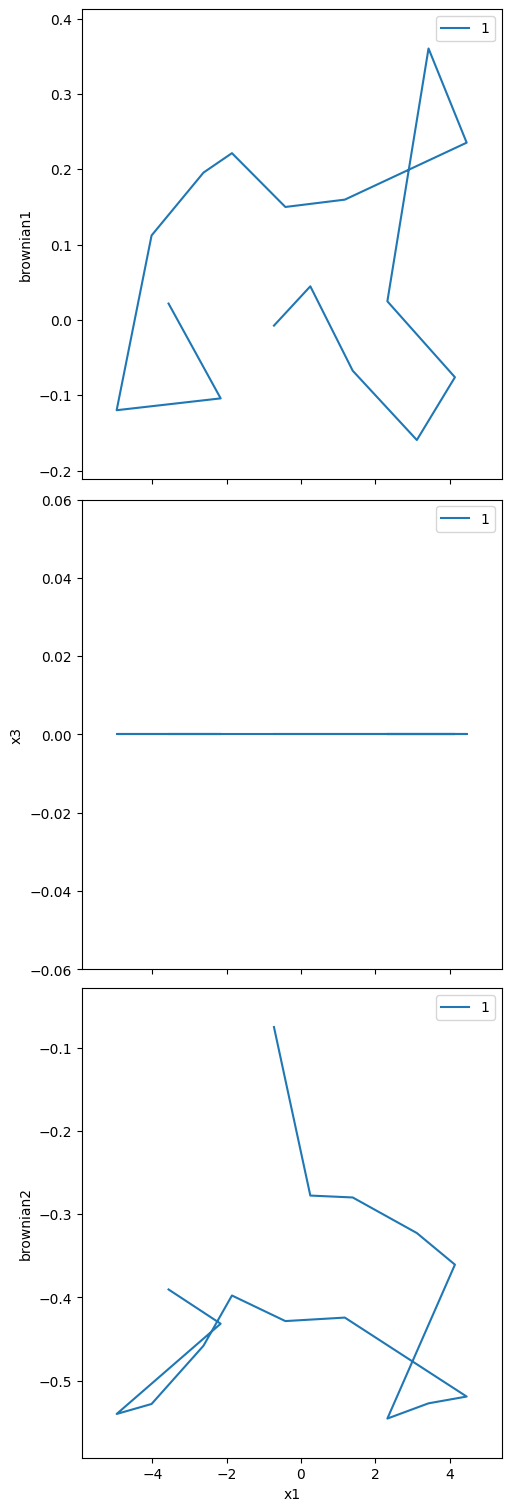

In [2]:
from blop.digestion.tests import constrained_himmelblau_digestion
from blop import DOF, Agent, Objective
from blop.dofs import BrownianMotion


dofs = [
    DOF(name="x1", search_domain=(-5.0, 5.0)),
    DOF(name="x2", search_domain=(-5.0, 5.0)),
    DOF(name="x3", search_domain=(-5.0, 5.0), active=False),
    DOF(device=BrownianMotion(name="brownian1"), read_only=True),
    DOF(device=BrownianMotion(name="brownian2"), read_only=True, active=False),
]

objectives = [
    Objective(name="himmelblau", target="min"),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=constrained_himmelblau_digestion,
    db=db,
    verbose=True,
    tolerate_acquisition_errors=False,
)

RE(agent.learn("qr", n=16))

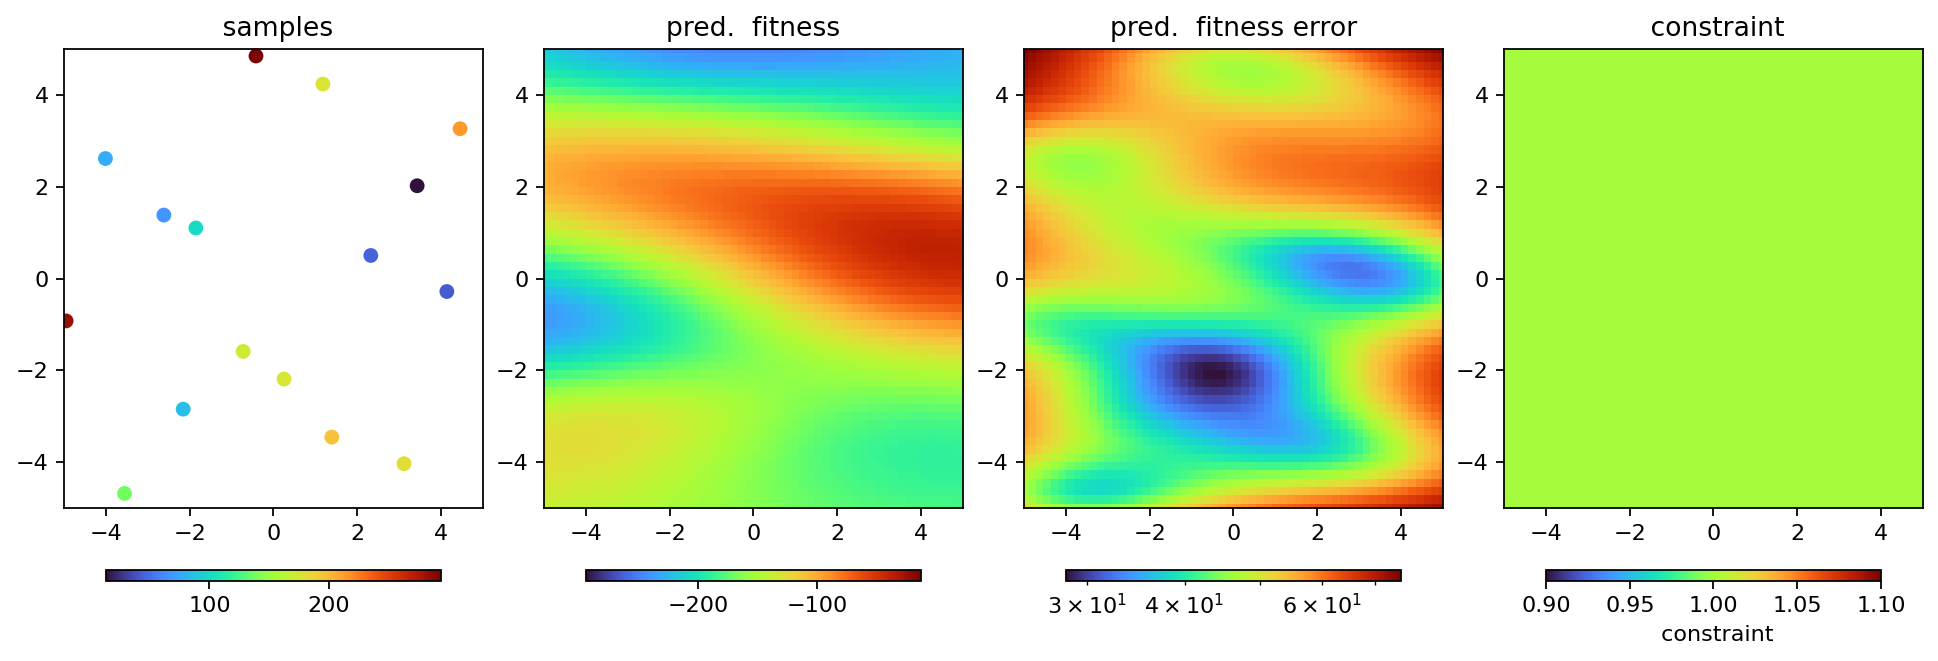

In [3]:
agent.plot_objectives()